# Complete Guide to Data Processing for Machine Learning

---

## Table of Contents
1. [Introduction](#introduction)
2. [Loading and Understanding Data](#loading-data)
3. [Handling Missing Values](#missing-values)
4. [Feature Scaling](#feature-scaling)
5. [Encoding Categorical Variables](#encoding)
6. [Feature Transformation](#transformation)
7. [Dimensionality Reduction](#dimensionality)
8. [Building Complete Pipelines](#pipelines)
9. [Summary and Best Practices](#summary)

---

## 1. Introduction <a id="introduction"></a>

Before applying machine learning algorithms, raw data must be **preprocessed** and **transformed** into a suitable format. This notebook covers the fundamental data processing techniques you'll need for Statistical Machine Learning, Regression, and Deep Learning.

### Why Data Processing?

Real-world data often has:
- **Missing values**: Incomplete observations
- **Different scales**: Features with vastly different ranges (e.g., age in [0,100] vs income in [0,1000000])
- **Categorical variables**: Non-numeric data (e.g., "color": red, green, blue)
- **High dimensionality**: Too many features leading to computational issues
- **Skewed distributions**: Non-normal data that violates algorithm assumptions

### Learning Objectives
By the end of this notebook, you will:
1. Understand the mathematical foundations of common preprocessing techniques
2. Handle missing data using imputation strategies
3. Scale and normalize features appropriately
4. Encode categorical variables for machine learning
5. Apply feature transformations and dimensionality reduction
6. Build complete preprocessing pipelines using scikit-learn

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.0.2
Pandas version: 2.2.2


---

## 2. Loading and Understanding Data <a id="loading-data"></a>

We'll use the **Breast Cancer Wisconsin dataset** - a classic dataset for binary classification. It contains measurements from breast cancer biopsies.

### Dataset Description
- **569 samples** (observations)
- **30 features** (measurements like radius, texture, perimeter, area, smoothness, etc.)
- **2 classes**: Malignant (cancerous) or Benign (non-cancerous)

In [ ]:
type(cancer)

ERROR: Error in type(cancer): could not find function "type"


In [ ]:
# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

ERROR: Error in datasets.load_breast_cancer(): could not find function "datasets.load_breast_cancer"


In [ ]:
# Basic statistics
print("Dataset Information:")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns)-1}")
print(f"\nTarget distribution:")
print(df['target'].value_counts())
print(f"\n0 = Malignant, 1 = Benign")

# Statistical summary
df.describe()

Dataset Information:
Number of samples: 569
Number of features: 30

Target distribution:
target
1    357
0    212
Name: count, dtype: int64

0 = Malignant, 1 = Benign


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


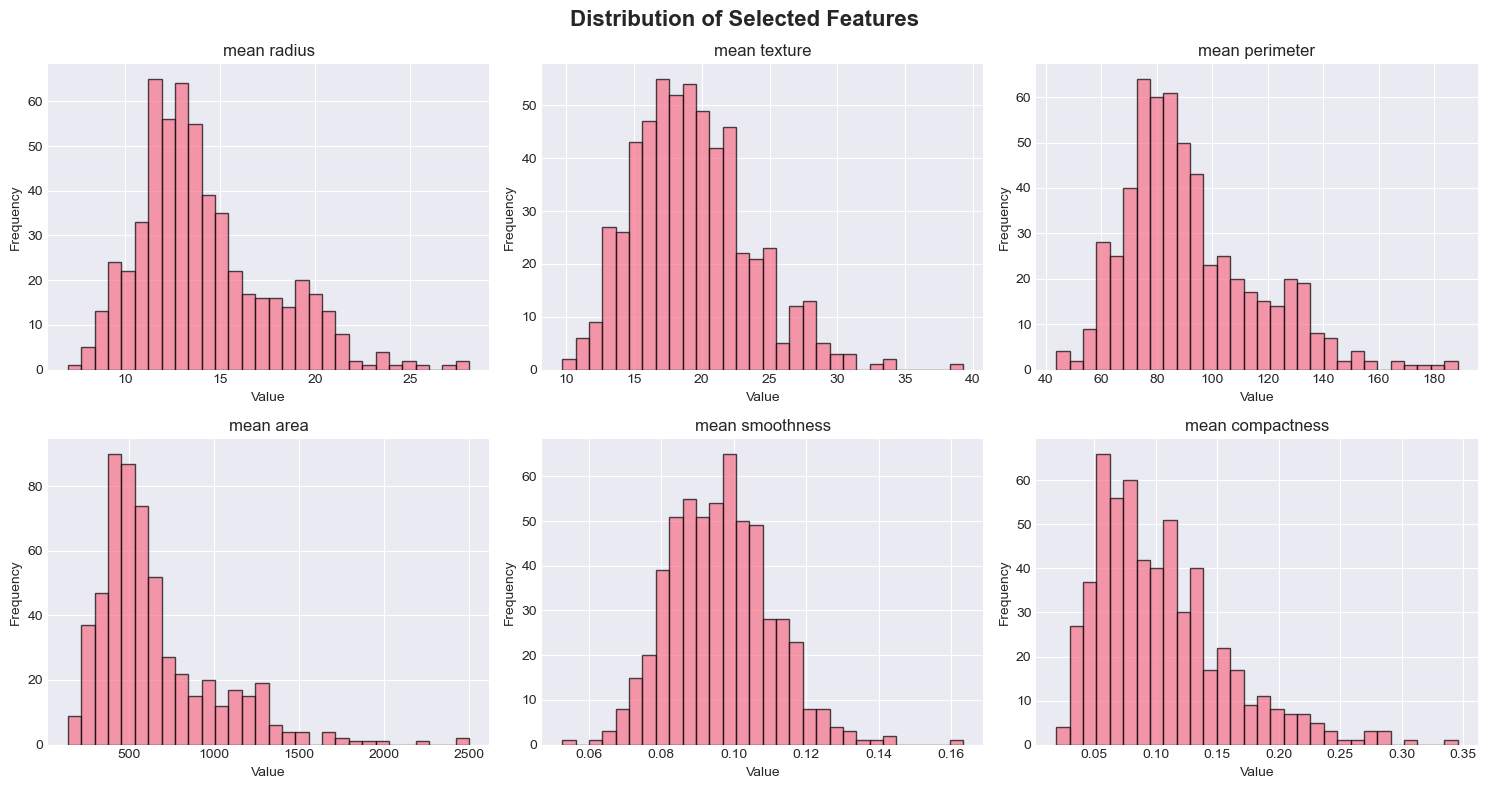


Notice: Different features have very different scales!


In [ ]:
# Visualize feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Distribution of Selected Features', fontsize=16, fontweight='bold')

features_to_plot = ['mean radius', 'mean texture', 'mean perimeter',
                    'mean area', 'mean smoothness', 'mean compactness']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nNotice: Different features have very different scales!")

---

## 3. Handling Missing Values <a id="missing-values"></a>

Missing data is common in real-world datasets. We need strategies to handle them before training models.

### Mathematical Foundation

Let $X = [x_1, x_2, ..., x_n]$ be a feature vector with missing values. We can impute (fill) missing values using:

#### 1. **Mean Imputation**
$$x_{missing} = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Best for: Normally distributed numerical data

#### 2. **Median Imputation**
$$x_{missing} = \text{median}(x_1, x_2, ..., x_n)$$

Best for: Skewed numerical data or data with outliers

#### 3. **Mode Imputation**
$$x_{missing} = \text{mode}(x_1, x_2, ..., x_n)$$

Best for: Categorical data

#### 4. **Constant Imputation**
$$x_{missing} = c \quad \text{(some constant)}$$

Best for: When missing values have specific meaning

### Real-World Example

In [ ]:
# Create a copy of our data and artificially introduce missing values
df_missing = df.copy()

# Randomly set 10% of values as missing in first 3 features
np.random.seed(42)
for col in ['mean radius', 'mean texture', 'mean perimeter']:
    missing_indices = np.random.choice(df_missing.index, size=int(0.1 * len(df_missing)), replace=False)
    df_missing.loc[missing_indices, col] = np.nan

print("Missing values per feature:")
print(df_missing.isnull().sum()[:5])
print(f"\nTotal missing values: {df_missing.isnull().sum().sum()}")

Missing values per feature:
mean radius        56
mean texture       56
mean perimeter     56
mean area           0
mean smoothness     0
dtype: int64

Total missing values: 168


In [ ]:
from sklearn.impute import SimpleImputer

# Separate features with missing values
X_missing = df_missing[['mean radius', 'mean texture', 'mean perimeter']]

print("Original data with missing values:")
print(X_missing.head(10))
print(f"\nMissing values: {X_missing.isnull().sum().sum()}")

Original data with missing values:
   mean radius  mean texture  mean perimeter
0        17.99         10.38          122.80
1        20.57           NaN          132.90
2        19.69         21.25          130.00
3        11.42         20.38           77.58
4        20.29         14.34          135.10
5        12.45         15.70           82.57
6          NaN         19.98          119.60
7        13.71         20.83           90.20
8        13.00         21.82           87.50
9        12.46         24.04           83.97

Missing values: 168


In [ ]:
# Strategy 1: Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
X_mean_imputed = mean_imputer.fit_transform(X_missing)

print("Mean Imputation:")
print(f"Imputed values used: {mean_imputer.statistics_}")
print(f"Missing values after imputation: {pd.DataFrame(X_mean_imputed).isnull().sum().sum()}")
print("\nFirst few rows after mean imputation:")
print(pd.DataFrame(X_mean_imputed, columns=X_missing.columns).head(10))

Mean Imputation:
Imputed values used: [14.164577   19.2914425  91.67510721]
Missing values after imputation: 0

First few rows after mean imputation:
   mean radius  mean texture  mean perimeter
0    17.990000     10.380000          122.80
1    20.570000     19.291442          132.90
2    19.690000     21.250000          130.00
3    11.420000     20.380000           77.58
4    20.290000     14.340000          135.10
5    12.450000     15.700000           82.57
6    14.164577     19.980000          119.60
7    13.710000     20.830000           90.20
8    13.000000     21.820000           87.50
9    12.460000     24.040000           83.97


In [ ]:
# Strategy 2: Median Imputation
median_imputer = SimpleImputer(strategy='median')
X_median_imputed = median_imputer.fit_transform(X_missing)

print("Median Imputation:")
print(f"Imputed values used: {median_imputer.statistics_}")

# Compare mean vs median
comparison = pd.DataFrame({
    'Feature': X_missing.columns,
    'Mean': mean_imputer.statistics_,
    'Median': median_imputer.statistics_
})
print("\nComparison of imputation values:")
print(comparison)

Median Imputation:
Imputed values used: [13.43 18.77 85.84]

Comparison of imputation values:
          Feature       Mean  Median
0     mean radius  14.164577   13.43
1    mean texture  19.291442   18.77
2  mean perimeter  91.675107   85.84


In [ ]:
# Strategy 3: Constant Imputation
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
X_constant_imputed = constant_imputer.fit_transform(X_missing)

print("Constant Imputation (filling with 0):")
print(pd.DataFrame(X_constant_imputed, columns=X_missing.columns).head(10))

Constant Imputation (filling with 0):
   mean radius  mean texture  mean perimeter
0        17.99         10.38          122.80
1        20.57          0.00          132.90
2        19.69         21.25          130.00
3        11.42         20.38           77.58
4        20.29         14.34          135.10
5        12.45         15.70           82.57
6         0.00         19.98          119.60
7        13.71         20.83           90.20
8        13.00         21.82           87.50
9        12.46         24.04           83.97


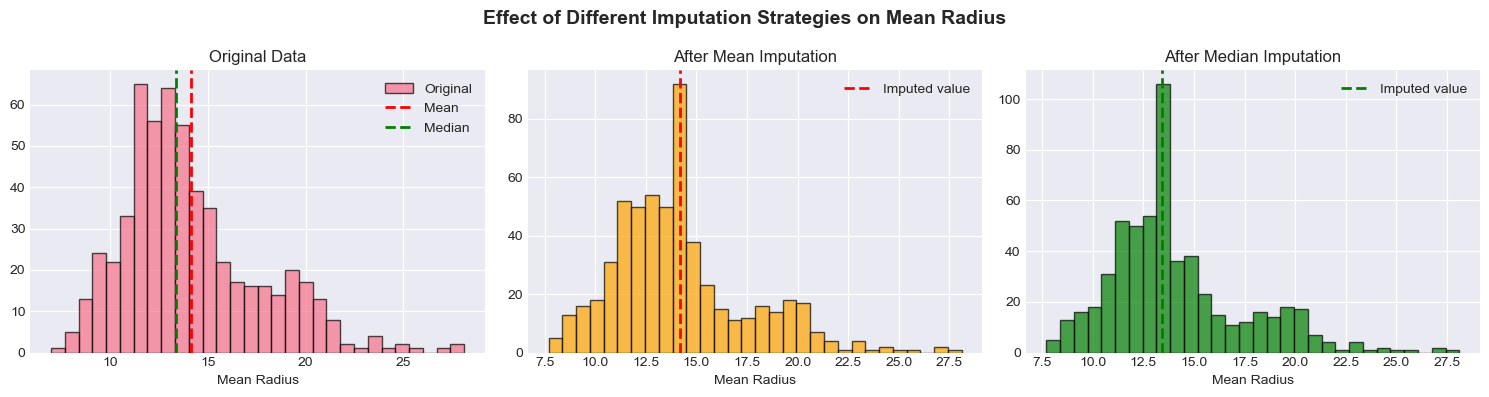

In [ ]:
# Visualize the effect of different imputation strategies
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Effect of Different Imputation Strategies on Mean Radius', fontsize=14, fontweight='bold')

# Original data (without missing)
axes[0].hist(df['mean radius'], bins=30, alpha=0.7, label='Original', edgecolor='black')
axes[0].axvline(df['mean radius'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['mean radius'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Mean Radius')
axes[0].legend()

# Mean imputed
axes[1].hist(X_mean_imputed[:, 0], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1].axvline(mean_imputer.statistics_[0], color='red', linestyle='--', linewidth=2, label='Imputed value')
axes[1].set_title('After Mean Imputation')
axes[1].set_xlabel('Mean Radius')
axes[1].legend()

# Median imputed
axes[2].hist(X_median_imputed[:, 0], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[2].axvline(median_imputer.statistics_[0], color='green', linestyle='--', linewidth=2, label='Imputed value')
axes[2].set_title('After Median Imputation')
axes[2].set_xlabel('Mean Radius')
axes[2].legend()

plt.tight_layout()
plt.show()

### Advanced: K-Nearest Neighbors (KNN) Imputation

KNN imputation uses the $k$ nearest neighbors to impute missing values:

$$x_{missing} = \frac{1}{k} \sum_{i=1}^{k} x_i^{(neighbor)}$$

where neighbors are determined by distance in feature space (e.g., Euclidean distance).

In [ ]:
from sklearn.impute import KNNImputer

# KNN Imputation with k=5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = knn_imputer.fit_transform(X_missing)

print("KNN Imputation (k=5):")
print("First few rows after KNN imputation:")
print(pd.DataFrame(X_knn_imputed, columns=X_missing.columns).head(10))

# Compare all methods
print("\n" + "="*60)
print("Comparison of first imputed value across methods:")
print(f"Original (before missing): {df.loc[0, 'mean radius']:.4f}")
print(f"Mean Imputation: {X_mean_imputed[0, 0]:.4f}")
print(f"Median Imputation: {X_median_imputed[0, 0]:.4f}")
print(f"KNN Imputation: {X_knn_imputed[0, 0]:.4f}")

KNN Imputation (k=5):
First few rows after KNN imputation:
   mean radius  mean texture  mean perimeter
0       17.990        10.380          122.80
1       20.570        22.798          132.90
2       19.690        21.250          130.00
3       11.420        20.380           77.58
4       20.290        14.340          135.10
5       12.450        15.700           82.57
6       16.556        19.980          119.60
7       13.710        20.830           90.20
8       13.000        21.820           87.50
9       12.460        24.040           83.97

Comparison of first imputed value across methods:
Original (before missing): 17.9900
Mean Imputation: 17.9900
Median Imputation: 17.9900
KNN Imputation: 17.9900


### Key Takeaways: Missing Values

1. **Mean imputation**: Simple, but sensitive to outliers
2. **Median imputation**: Robust to outliers, good for skewed data
3. **KNN imputation**: More sophisticated, preserves relationships between features
4. **Always check**: Is the missingness random or systematic?

---

## 4. Feature Scaling <a id="feature-scaling"></a>

Many machine learning algorithms (e.g., gradient descent, KNN, SVM, neural networks) are sensitive to the scale of features.

### Why Scale?

Consider two features:
- **Age**: range [0, 100]
- **Income**: range [0, 1,000,000]

Without scaling, income dominates distance calculations and gradient updates!

### Mathematical Foundation

#### 1. **Min-Max Normalization (Normalization)**

Scales features to a fixed range $[0, 1]$:

$$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

**Properties:**
- Preserves original distribution shape
- Sensitive to outliers
- Guarantees all features in $[0, 1]$

#### 2. **Standardization (Z-score Normalization)**

Centers data around mean with unit variance:

$$x_{scaled} = \frac{x - \mu}{\sigma}$$

where $\mu = \frac{1}{n}\sum_{i=1}^n x_i$ and $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2}$

**Properties:**
- Results in mean = 0, std = 1
- Less sensitive to outliers than Min-Max
- Does not bound values to a specific range

#### 3. **Robust Scaling**

Uses median and interquartile range (IQR):

$$x_{scaled} = \frac{x - \text{median}(x)}{\text{IQR}(x)}$$

where $\text{IQR} = Q_3 - Q_1$ (75th percentile - 25th percentile)

**Properties:**
- Most robust to outliers
- Uses statistics that are not influenced by extreme values

In [ ]:
# Select a few features for scaling demonstration
X = df[['mean radius', 'mean texture', 'mean perimeter']].copy()

print("Original Data Statistics:")
print(X.describe())
print("\nNotice the different scales: radius ~14, texture ~19, perimeter ~92")

Original Data Statistics:
       mean radius  mean texture  mean perimeter
count   569.000000    569.000000      569.000000
mean     14.127292     19.289649       91.969033
std       3.524049      4.301036       24.298981
min       6.981000      9.710000       43.790000
25%      11.700000     16.170000       75.170000
50%      13.370000     18.840000       86.240000
75%      15.780000     21.800000      104.100000
max      28.110000     39.280000      188.500000

Notice the different scales: radius ~14, texture ~19, perimeter ~92


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 1. Min-Max Normalization
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

print("Min-Max Scaling (Range: [0, 1])")
print(f"Min values: {X_minmax.min(axis=0)}")
print(f"Max values: {X_minmax.max(axis=0)}")
print("\nFirst few scaled values:")
print(pd.DataFrame(X_minmax, columns=X.columns).head())

Min-Max Scaling (Range: [0, 1])
Min values: [0. 0. 0.]
Max values: [1. 1. 1.]

First few scaled values:
   mean radius  mean texture  mean perimeter
0     0.521037      0.022658        0.545989
1     0.643144      0.272574        0.615783
2     0.601496      0.390260        0.595743
3     0.210090      0.360839        0.233501
4     0.629893      0.156578        0.630986


In [ ]:
# 2. Standardization (Z-score)
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

print("Standardization (Mean=0, Std=1)")
print(f"Mean values: {X_standard.mean(axis=0)}")
print(f"Std values: {X_standard.std(axis=0)}")
print("\nFirst few scaled values:")
print(pd.DataFrame(X_standard, columns=X.columns).head())

Standardization (Mean=0, Std=1)
Mean values: [-1.37363271e-16  6.86816353e-17 -1.24875700e-16]
Std values: [1. 1. 1.]

First few scaled values:
   mean radius  mean texture  mean perimeter
0     1.097064     -2.073335        1.269934
1     1.829821     -0.353632        1.685955
2     1.579888      0.456187        1.566503
3    -0.768909      0.253732       -0.592687
4     1.750297     -1.151816        1.776573


In [ ]:
# 3. Robust Scaling
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

print("Robust Scaling (Median=0, IQR-based)")
print(f"Median values: {np.median(X_robust, axis=0)}")
print("\nFirst few scaled values:")
print(pd.DataFrame(X_robust, columns=X.columns).head())

Robust Scaling (Median=0, IQR-based)
Median values: [0. 0. 0.]

First few scaled values:
   mean radius  mean texture  mean perimeter
0     1.132353     -1.502664        1.263740
1     1.764706     -0.190053        1.612859
2     1.549020      0.428064        1.512617
3    -0.477941      0.273535       -0.299343
4     1.696078     -0.799290        1.688904


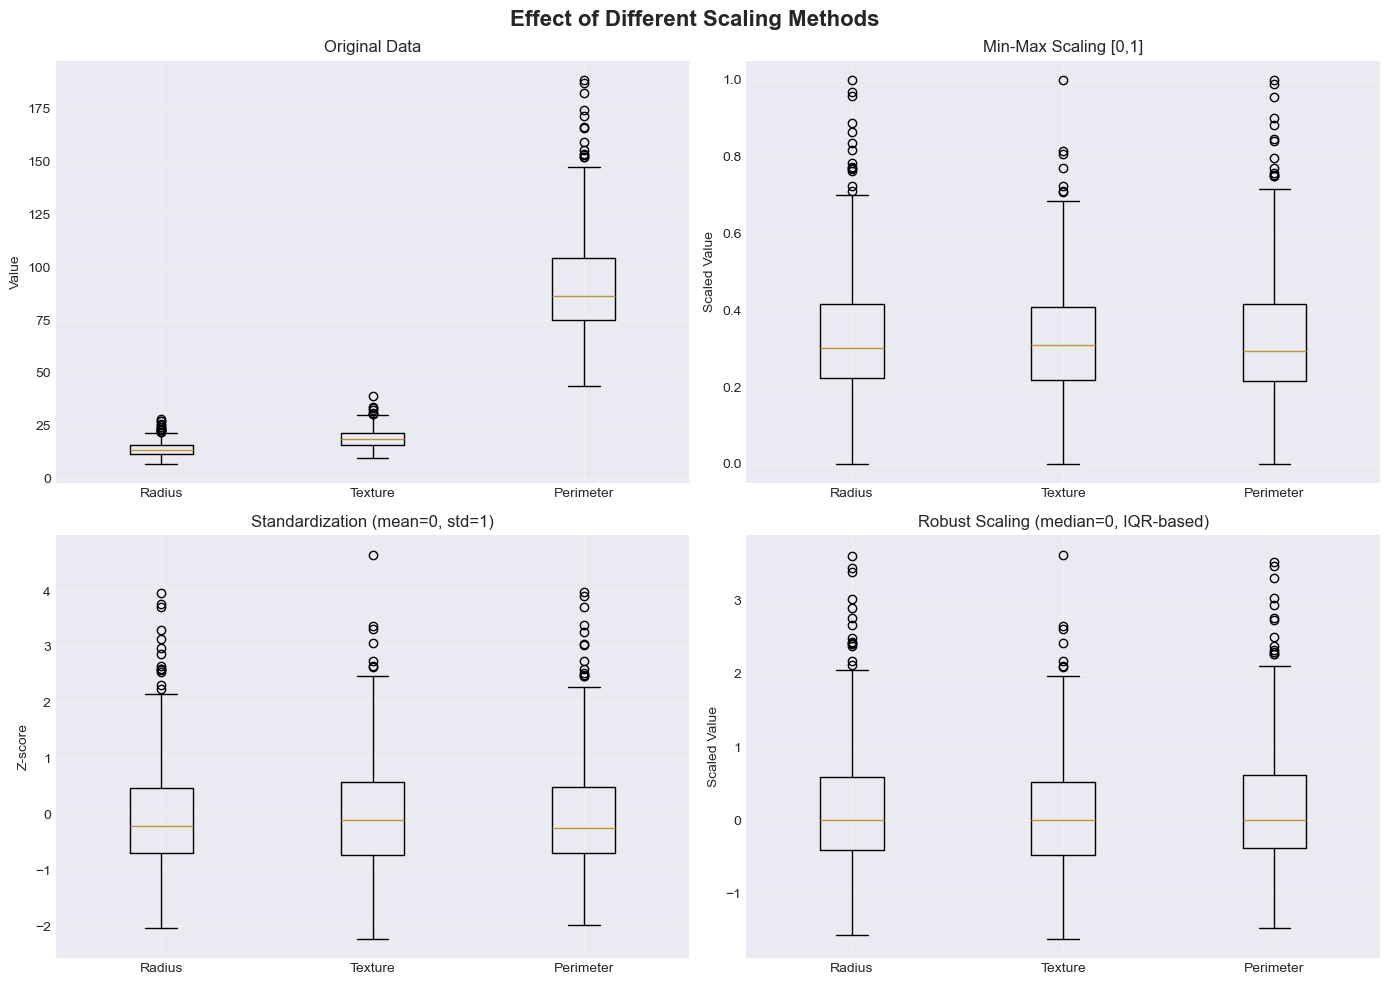

Notice: All methods bring features to comparable scales!


In [ ]:
# Visualize the effect of different scaling methods
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Effect of Different Scaling Methods', fontsize=16, fontweight='bold')

# Original data
axes[0, 0].boxplot([X['mean radius'], X['mean texture'], X['mean perimeter']],
                     labels=['Radius', 'Texture', 'Perimeter'])
axes[0, 0].set_title('Original Data', fontsize=12)
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Min-Max scaled
axes[0, 1].boxplot([X_minmax[:, 0], X_minmax[:, 1], X_minmax[:, 2]],
                     labels=['Radius', 'Texture', 'Perimeter'])
axes[0, 1].set_title('Min-Max Scaling [0,1]', fontsize=12)
axes[0, 1].set_ylabel('Scaled Value')
axes[0, 1].grid(True, alpha=0.3)

# Standardized
axes[1, 0].boxplot([X_standard[:, 0], X_standard[:, 1], X_standard[:, 2]],
                     labels=['Radius', 'Texture', 'Perimeter'])
axes[1, 0].set_title('Standardization (mean=0, std=1)', fontsize=12)
axes[1, 0].set_ylabel('Z-score')
axes[1, 0].grid(True, alpha=0.3)

# Robust scaled
axes[1, 1].boxplot([X_robust[:, 0], X_robust[:, 1], X_robust[:, 2]],
                     labels=['Radius', 'Texture', 'Perimeter'])
axes[1, 1].set_title('Robust Scaling (median=0, IQR-based)', fontsize=12)
axes[1, 1].set_ylabel('Scaled Value')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice: All methods bring features to comparable scales!")

In [ ]:
# Important property: Scaling preserves correlations
print("Correlation Matrix - Original Data:")
print(np.corrcoef(X, rowvar=False))
print("\nCorrelation Matrix - After Min-Max Scaling:")
print(np.corrcoef(X_minmax, rowvar=False))
print("\nCorrelation Matrix - After Standardization:")
print(np.corrcoef(X_standard, rowvar=False))
print("\n✓ Correlations are preserved across all scaling methods!")

Correlation Matrix - Original Data:
[[1.         0.32378189 0.99785528]
 [0.32378189 1.         0.32953306]
 [0.99785528 0.32953306 1.        ]]

Correlation Matrix - After Min-Max Scaling:
[[1.         0.32378189 0.99785528]
 [0.32378189 1.         0.32953306]
 [0.99785528 0.32953306 1.        ]]

Correlation Matrix - After Standardization:
[[1.         0.32378189 0.99785528]
 [0.32378189 1.         0.32953306]
 [0.99785528 0.32953306 1.        ]]

✓ Correlations are preserved across all scaling methods!


### When to Use Which Scaler?

| Scaler | Use When | Algorithms |
|--------|----------|------------|
| **Min-Max** | You need bounded values [0,1] | Neural Networks, Image Processing |
| **Standard** | Data is approximately normal | Linear Regression, Logistic Regression, SVM |
| **Robust** | Data has outliers | Any algorithm, especially with outliers |

---

## 5. Encoding Categorical Variables <a id="encoding"></a>

Machine learning algorithms require numerical inputs. We must encode categorical variables.

### Types of Categorical Variables

1. **Nominal**: No natural order (e.g., color: red, green, blue)
2. **Ordinal**: Natural order (e.g., education: high school, bachelor, master, PhD)

### Mathematical Foundation

#### 1. **Label Encoding**

Maps categories to integers: ${\text{cat}_1, \text{cat}_2, ..., \text{cat}_k} \rightarrow {0, 1, ..., k-1}$

**Warning**: Creates artificial ordering! Use only for:
- Ordinal variables
- Target variables in classification

#### 2. **One-Hot Encoding**

Creates binary vector for each category:

For $k$ categories, each observation becomes a $k$-dimensional binary vector:

$$\text{cat}_i \rightarrow [0, 0, ..., 1, ..., 0]$$

where the $i$-th position is 1.

**Example**: color $\in$ {red, green, blue}
- red $\rightarrow [1, 0, 0]$
- green $\rightarrow [0, 1, 0]$
- blue $\rightarrow [0, 0, 1]$

**Advantage**: No artificial ordering

**Disadvantage**: Increases dimensionality (curse of dimensionality with many categories)

In [ ]:
# Create a categorical variable from our continuous target
# Let's create education levels as an example
education_data = pd.DataFrame({
    'education': ['High School', 'Bachelor', 'High School', 'Master', 'PhD',
                  'Bachelor', 'Master', 'High School', 'PhD', 'Bachelor']
})

print("Original Categorical Data:")
print(education_data)
print(f"\nUnique categories: {education_data['education'].unique()}")

Original Categorical Data:
     education
0  High School
1     Bachelor
2  High School
3       Master
4          PhD
5     Bachelor
6       Master
7  High School
8          PhD
9     Bachelor

Unique categories: ['High School' 'Bachelor' 'Master' 'PhD']


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# 1. Label Encoding (for ordinal data or target variable)
label_encoder = LabelEncoder()
education_labeled = label_encoder.fit_transform(education_data['education'])

print("Label Encoding:")
print(f"Classes: {label_encoder.classes_}")
print(f"Encoded values: {education_labeled}")
print("\nMapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} → {i}")

Label Encoding:
Classes: ['Bachelor' 'High School' 'Master' 'PhD']
Encoded values: [1 0 1 2 3 0 2 1 3 0]

Mapping:
Bachelor → 0
High School → 1
Master → 2
PhD → 3


In [ ]:
# 2. Ordinal Encoding (when order matters)
ordinal_encoder = OrdinalEncoder(
    categories=[['High School', 'Bachelor', 'Master', 'PhD']]
)
education_ordinal = ordinal_encoder.fit_transform(education_data)

print("Ordinal Encoding (with specified order):")
print(education_ordinal.flatten())
print("\nMapping (preserves educational hierarchy):")
print("High School → 0")
print("Bachelor → 1")
print("Master → 2")
print("PhD → 3")

Ordinal Encoding (with specified order):
[0. 1. 0. 2. 3. 1. 2. 0. 3. 1.]

Mapping (preserves educational hierarchy):
High School → 0
Bachelor → 1
Master → 2
PhD → 3


In [ ]:
# 3. One-Hot Encoding (for nominal data)
# Create color data (nominal - no natural order)
color_data = pd.DataFrame({
    'color': ['red', 'green', 'blue', 'red', 'green', 'blue', 'red']
})

print("Original Color Data (Nominal):")
print(color_data['color'].values)

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
color_onehot = onehot_encoder.fit_transform(color_data)

print("\nOne-Hot Encoding:")
print(f"Categories: {onehot_encoder.categories_}")
print("\nEncoded as binary vectors:")
color_onehot_df = pd.DataFrame(
    color_onehot,
    columns=[f'color_{cat}' for cat in onehot_encoder.categories_[0]]
)
print(color_onehot_df)

Original Color Data (Nominal):
['red' 'green' 'blue' 'red' 'green' 'blue' 'red']

One-Hot Encoding:
Categories: [array(['blue', 'green', 'red'], dtype=object)]

Encoded as binary vectors:
   color_blue  color_green  color_red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0
3         0.0          0.0        1.0
4         0.0          1.0        0.0
5         1.0          0.0        0.0
6         0.0          0.0        1.0


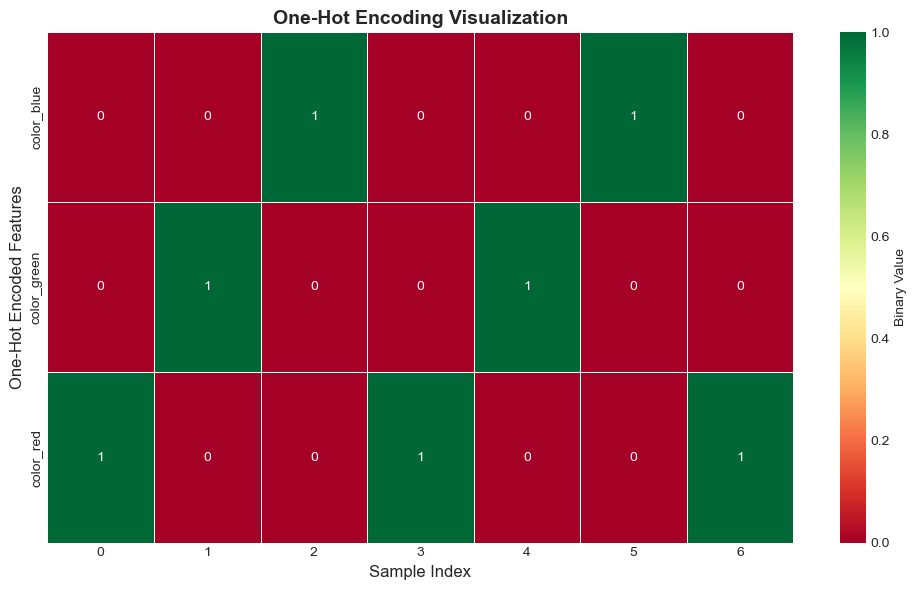

Each row is a binary vector representing one category!


In [ ]:
# Visualize One-Hot Encoding
fig, ax = plt.subplots(figsize=(10, 6))

# Create a heatmap
sns.heatmap(color_onehot_df.T, annot=True, fmt='g', cmap='RdYlGn',
            cbar_kws={'label': 'Binary Value'}, linewidths=0.5, ax=ax)
ax.set_xlabel('Sample Index', fontsize=12)
ax.set_ylabel('One-Hot Encoded Features', fontsize=12)
ax.set_title('One-Hot Encoding Visualization', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Each row is a binary vector representing one category!")

In [ ]:
# Handling the Dummy Variable Trap
# When using linear models, drop one category to avoid multicollinearity
onehot_encoder_drop = OneHotEncoder(sparse_output=False, drop='first')
color_onehot_drop = onehot_encoder_drop.fit_transform(color_data)

print("One-Hot Encoding with drop='first' (avoiding dummy variable trap):")
print(f"Original categories: {onehot_encoder.categories_[0]}")
print(f"Encoded dimensions: {color_onehot_drop.shape[1]} (dropped 'blue')")
print("\nEncoded values:")
print(pd.DataFrame(color_onehot_drop, columns=['color_green', 'color_red']))
print("\nNote: [0, 0] now represents 'blue' (the dropped category)")

One-Hot Encoding with drop='first' (avoiding dummy variable trap):
Original categories: ['blue' 'green' 'red']
Encoded dimensions: 2 (dropped 'blue')

Encoded values:
   color_green  color_red
0          0.0        1.0
1          1.0        0.0
2          0.0        0.0
3          0.0        1.0
4          1.0        0.0
5          0.0        0.0
6          0.0        1.0

Note: [0, 0] now represents 'blue' (the dropped category)


### Key Takeaways: Encoding

1. **Label Encoding**: Use for ordinal variables or target in classification
2. **Ordinal Encoding**: Like label encoding but with specified order
3. **One-Hot Encoding**: Use for nominal variables (no natural order)
4. **Dummy Trap**: In linear models, drop one category to avoid perfect multicollinearity

---

## 6. Feature Transformation <a id="transformation"></a>

Sometimes we need to transform features to make them more suitable for modeling.

### 6.1 Discretization (Binning)

Converting continuous variables into discrete bins.

**Mathematical Foundation:**

Partition the range of $x$ into $k$ bins: $B_1, B_2, ..., B_k$

$$x \in B_i \Rightarrow x_{binned} = i$$

**Strategies:**
1. **Uniform width**: Equal-sized bins
2. **Quantile-based**: Each bin has equal number of samples
3. **K-means**: Bins based on clustering

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Select a feature for binning
X_to_bin = df[['mean radius', 'mean area']].copy()

print("Original continuous data:")
print(X_to_bin.describe())

Original continuous data:
       mean radius    mean area
count   569.000000   569.000000
mean     14.127292   654.889104
std       3.524049   351.914129
min       6.981000   143.500000
25%      11.700000   420.300000
50%      13.370000   551.100000
75%      15.780000   782.700000
max      28.110000  2501.000000


In [ ]:
# Strategy 1: Uniform width bins
uniform_binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_uniform_bins = uniform_binner.fit_transform(X_to_bin)

print("Uniform Width Binning (5 bins):")
print(f"Bin edges for 'mean radius': {uniform_binner.bin_edges_[0]}")
print(f"\nFirst 10 samples - binned values:")
print(X_uniform_bins[:10])

Uniform Width Binning (5 bins):
Bin edges for 'mean radius': [ 6.981  11.2068 15.4326 19.6584 23.8842 28.11  ]

First 10 samples - binned values:
[[2. 1.]
 [3. 2.]
 [3. 2.]
 [1. 0.]
 [3. 2.]
 [1. 0.]
 [2. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Strategy 2: Quantile-based bins (equal frequency)
quantile_binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X_quantile_bins = quantile_binner.fit_transform(X_to_bin)

print("Quantile-based Binning (5 bins):")
print(f"Bin edges for 'mean radius': {quantile_binner.bin_edges_[0]}")

# Check that each bin has roughly equal counts
unique, counts = np.unique(X_quantile_bins[:, 0], return_counts=True)
print(f"\nSamples per bin: {counts}")
print("Notice: Each bin has approximately the same number of samples!")

Quantile-based Binning (5 bins):
Bin edges for 'mean radius': [ 6.981 11.366 12.726 14.058 17.068 28.11 ]

Samples per bin: [114 114 113 114 114]
Notice: Each bin has approximately the same number of samples!


In [ ]:
# Strategy 3: K-means based bins
kmeans_binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
X_kmeans_bins = kmeans_binner.fit_transform(X_to_bin)

print("K-means Binning (5 bins):")
print(f"Bin edges for 'mean radius': {kmeans_binner.bin_edges_[0]}")

K-means Binning (5 bins):
Bin edges for 'mean radius': [ 6.981      11.54313104 14.10838377 17.42973635 22.07075669 28.11      ]


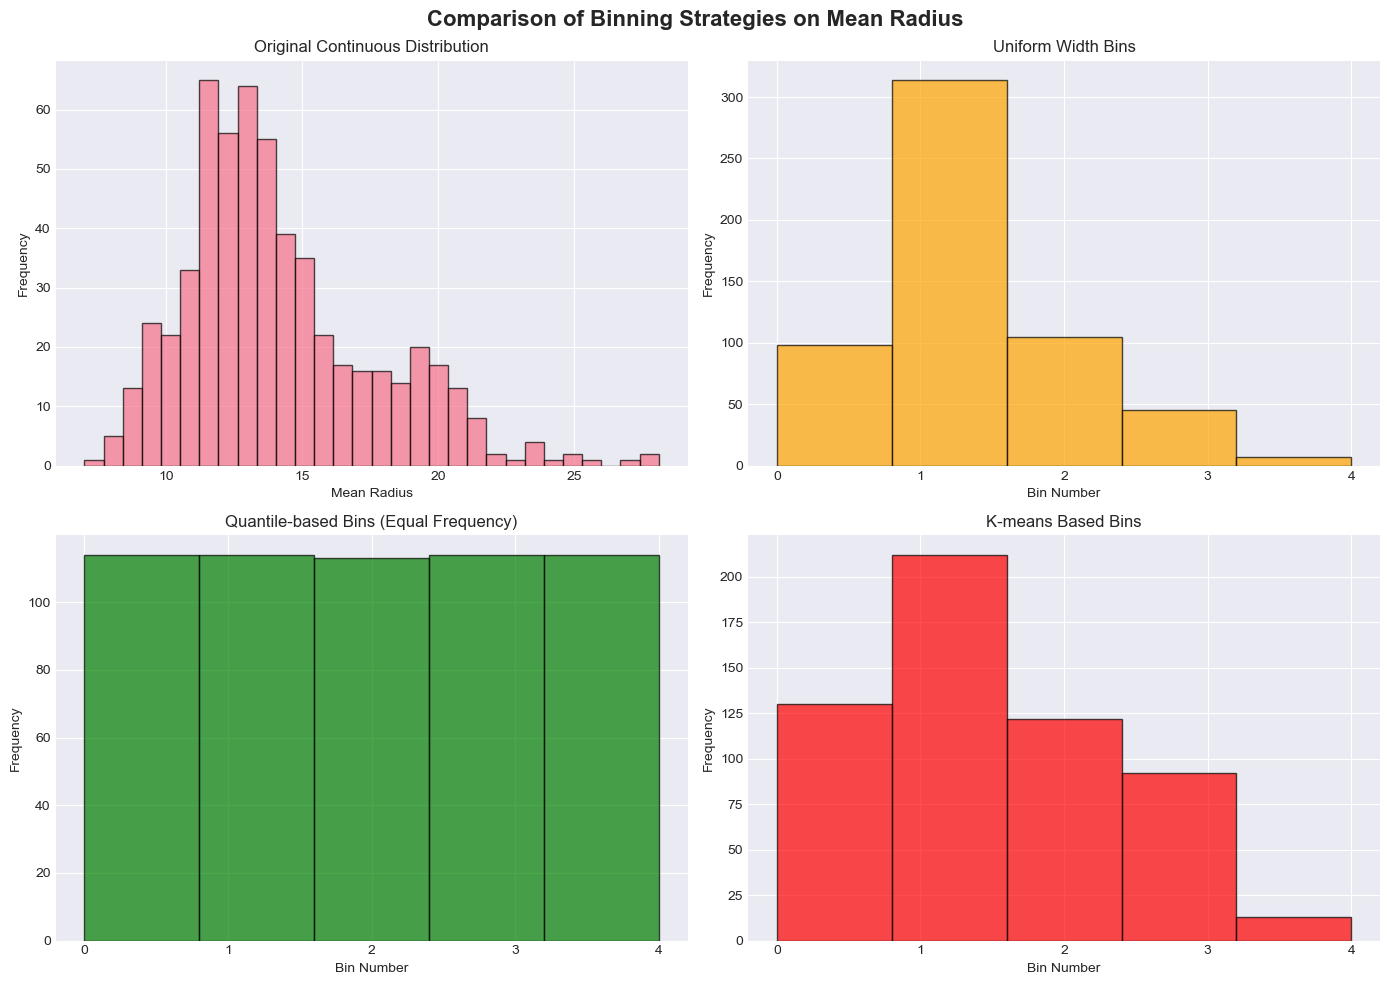

In [ ]:
# Visualize different binning strategies
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of Binning Strategies on Mean Radius', fontsize=16, fontweight='bold')

# Original distribution
axes[0, 0].hist(X_to_bin['mean radius'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Original Continuous Distribution')
axes[0, 0].set_xlabel('Mean Radius')
axes[0, 0].set_ylabel('Frequency')

# Uniform bins
axes[0, 1].hist(X_uniform_bins[:, 0], bins=5, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Uniform Width Bins')
axes[0, 1].set_xlabel('Bin Number')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xticks(range(5))

# Quantile bins
axes[1, 0].hist(X_quantile_bins[:, 0], bins=5, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Quantile-based Bins (Equal Frequency)')
axes[1, 0].set_xlabel('Bin Number')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(range(5))

# K-means bins
axes[1, 1].hist(X_kmeans_bins[:, 0], bins=5, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('K-means Based Bins')
axes[1, 1].set_xlabel('Bin Number')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xticks(range(5))

plt.tight_layout()
plt.show()

### 6.2 Power Transforms

Transform skewed distributions to be more Gaussian-like.

**Box-Cox Transform:**

$$x_{transformed} = \begin{cases}
\frac{x^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\log(x) & \text{if } \lambda = 0
\end{cases}$$

**Yeo-Johnson Transform** (works with negative values):

More complex formula, but similar idea - finds optimal $\lambda$ to make data more Gaussian.

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Select a skewed feature
X_skewed = df[['mean area']].copy()

print("Original data (right-skewed):")
print(X_skewed.describe())
print(f"\nSkewness: {X_skewed['mean area'].skew():.4f}")

Original data (right-skewed):
         mean area
count   569.000000
mean    654.889104
std     351.914129
min     143.500000
25%     420.300000
50%     551.100000
75%     782.700000
max    2501.000000

Skewness: 1.6457


In [ ]:
# Apply Yeo-Johnson transform
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_transformed = power_transformer.fit_transform(X_skewed)

print("After Yeo-Johnson Power Transform:")
print(f"Optimal lambda: {power_transformer.lambdas_[0]:.4f}")
print(f"Skewness after transform: {pd.Series(X_transformed.flatten()).skew():.4f}")

After Yeo-Johnson Power Transform:
Optimal lambda: -0.2134
Skewness after transform: 0.0052


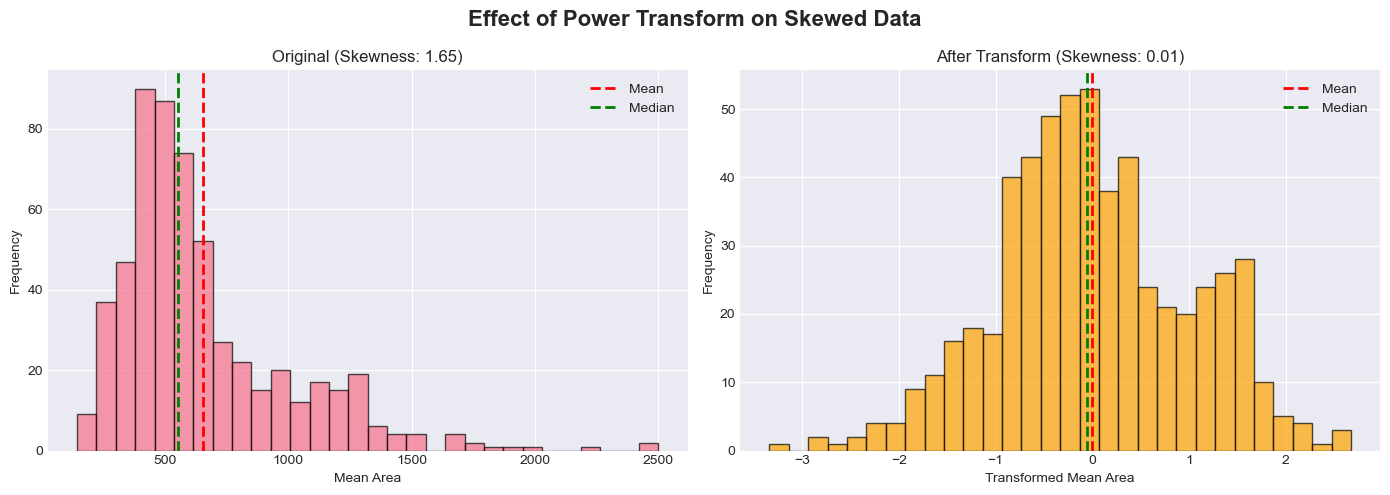

Notice: The transformed distribution is much more symmetric (Gaussian-like)!


In [ ]:
# Visualize the transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Effect of Power Transform on Skewed Data', fontsize=16, fontweight='bold')

# Original distribution
axes[0].hist(X_skewed['mean area'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(X_skewed['mean area'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(X_skewed['mean area'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_title(f'Original (Skewness: {X_skewed["mean area"].skew():.2f})')
axes[0].set_xlabel('Mean Area')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Transformed distribution
axes[1].hist(X_transformed, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(X_transformed.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1].axvline(np.median(X_transformed), color='green', linestyle='--', linewidth=2, label='Median')
axes[1].set_title(f'After Transform (Skewness: {pd.Series(X_transformed.flatten()).skew():.2f})')
axes[1].set_xlabel('Transformed Mean Area')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Notice: The transformed distribution is much more symmetric (Gaussian-like)!")

---

## 7. Dimensionality Reduction <a id="dimensionality"></a>

High-dimensional data suffers from:
- **Curse of dimensionality**: Data becomes sparse
- **Computational cost**: More features = more computation
- **Overfitting**: Models may fit noise instead of signal

### Principal Component Analysis (PCA)

PCA finds orthogonal directions (principal components) that maximize variance.

**Mathematical Foundation:**

Given data matrix $X \in \mathbb{R}^{n \times p}$ (n samples, p features):

1. Center the data: $X_c = X - \bar{X}$

2. Compute covariance matrix: $C = \frac{1}{n-1} X_c^T X_c$

3. Find eigenvalues $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_p$ and eigenvectors $v_1, v_2, ..., v_p$

4. Principal components: $PC_i = X_c \cdot v_i$

5. Variance explained by $PC_i$: $\frac{\lambda_i}{\sum_{j=1}^p \lambda_j}$

**Key Properties:**
- Principal components are **orthogonal** (uncorrelated)
- First PC captures most variance, second PC captures second most, etc.
- Reduces dimensionality while preserving maximum variance

In [ ]:
from sklearn.decomposition import PCA

# Use all features (except target)
X_full = df.drop('target', axis=1)

print(f"Original data shape: {X_full.shape}")
print(f"Number of features: {X_full.shape[1]}")

# Standardize first (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Apply PCA (keep all components for analysis)
pca_full = PCA()
X_pca = pca_full.fit_transform(X_scaled)

print(f"\nPCA transformed shape: {X_pca.shape}")
print(f"\nVariance explained by each component (first 10):")
for i, var in enumerate(pca_full.explained_variance_ratio_[:10]):
    print(f"PC{i+1}: {var*100:.2f}%")

Original data shape: (569, 30)
Number of features: 30

PCA transformed shape: (569, 30)

Variance explained by each component (first 10):
PC1: 44.27%
PC2: 18.97%
PC3: 9.39%
PC4: 6.60%
PC5: 5.50%
PC6: 4.02%
PC7: 2.25%
PC8: 1.59%
PC9: 1.39%
PC10: 1.17%


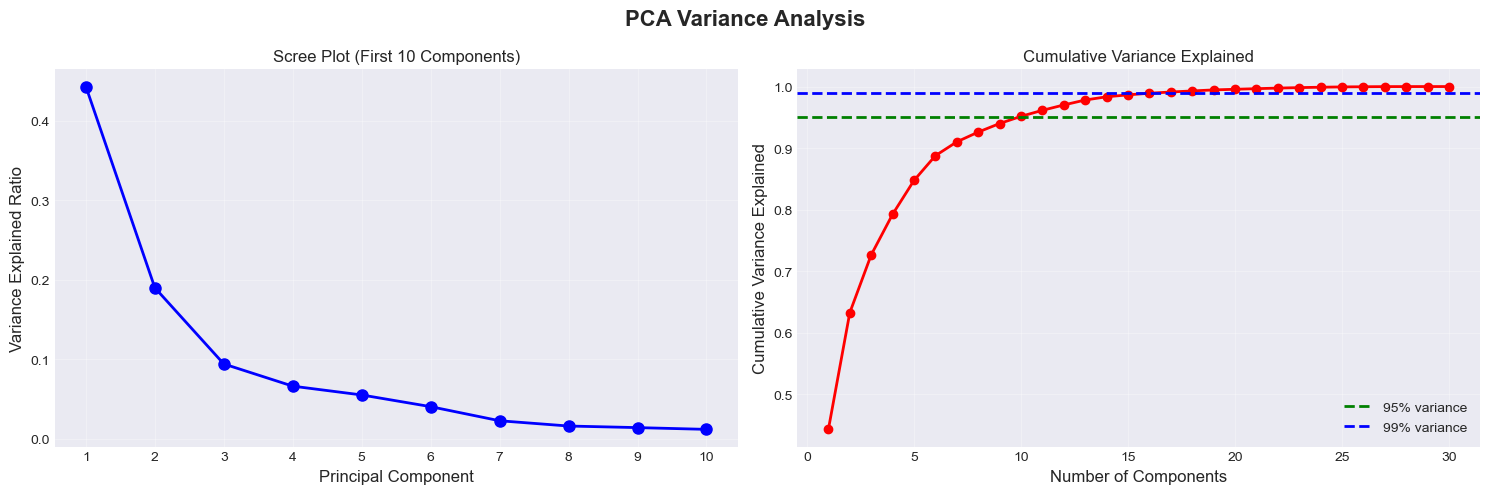


Components needed for 95% variance: 10 (out of 30)
Components needed for 99% variance: 17 (out of 30)

Dimensionality reduction: 30 → 10 features (83% reduction!)


In [ ]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('PCA Variance Analysis', fontsize=16, fontweight='bold')

# Scree plot
axes[0].plot(range(1, 11), pca_full.explained_variance_ratio_[:10], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Variance Explained Ratio', fontsize=12)
axes[0].set_title('Scree Plot (First 10 Components)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 11))

# Cumulative variance
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)
axes[1].plot(range(1, len(cumsum_variance)+1), cumsum_variance, 'ro-', linewidth=2, markersize=6)
axes[1].axhline(y=0.95, color='green', linestyle='--', linewidth=2, label='95% variance')
axes[1].axhline(y=0.99, color='blue', linestyle='--', linewidth=2, label='99% variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Variance Explained', fontsize=12)
axes[1].set_title('Cumulative Variance Explained')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Find number of components for 95% and 99% variance
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
n_components_99 = np.argmax(cumsum_variance >= 0.99) + 1

print(f"\nComponents needed for 95% variance: {n_components_95} (out of {X_full.shape[1]})")
print(f"Components needed for 99% variance: {n_components_99} (out of {X_full.shape[1]})")
print(f"\nDimensionality reduction: {X_full.shape[1]} → {n_components_95} features (83% reduction!)")

In [ ]:
# Apply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components_95)
X_pca_reduced = pca_optimal.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca_reduced.shape}")
print(f"Variance retained: {pca_optimal.explained_variance_ratio_.sum()*100:.2f}%")

Original shape: (569, 30)
Reduced shape: (569, 10)
Variance retained: 95.16%


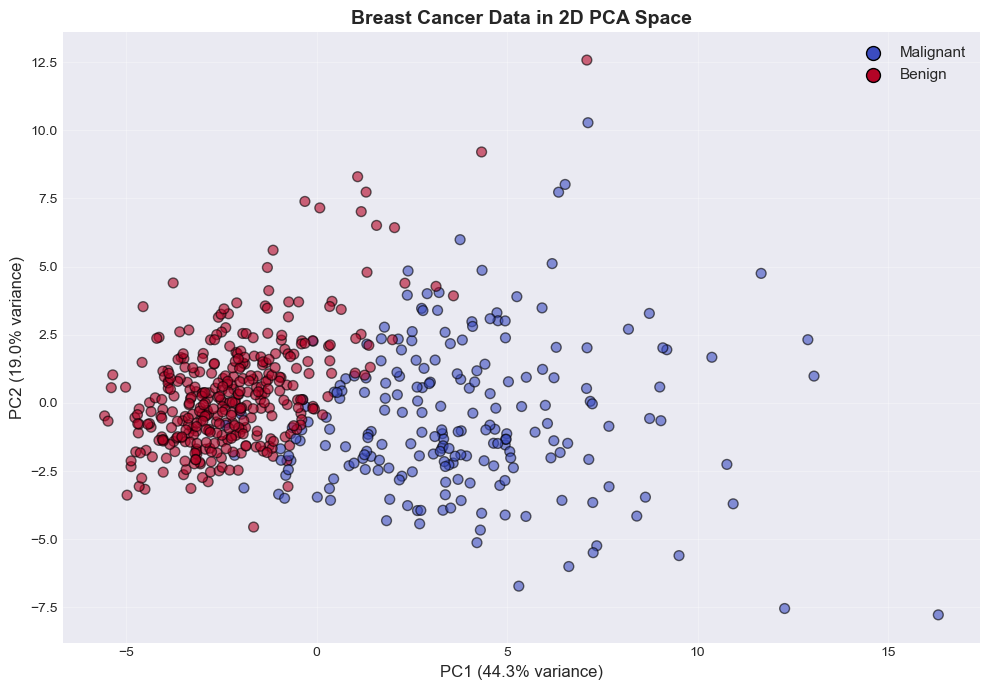


30 features reduced to 2 for visualization!
These 2 components explain 63.24% of variance


In [ ]:
# Visualize data in first 2 principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                     c=df['target'], cmap='coolwarm',
                     alpha=0.6, edgecolors='black', s=50)
ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
ax.set_title('Breast Cancer Data in 2D PCA Space', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add legend
legend_labels = ['Malignant', 'Benign']
legend_elements = [plt.scatter([], [], c=scatter.cmap(scatter.norm(i)),
                               s=100, edgecolors='black', label=legend_labels[i])
                   for i in range(2)]
ax.legend(handles=legend_elements, loc='best', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n30 features reduced to 2 for visualization!")
print(f"These 2 components explain {pca_2d.explained_variance_ratio_.sum()*100:.2f}% of variance")

Correlation matrix of first 5 principal components:
[[ 1.00000000e+00 -7.06658998e-16  7.55244854e-17  1.46083457e-16
  -1.97473803e-16]
 [-7.06658998e-16  1.00000000e+00  3.74183642e-17 -1.71090195e-16
  -6.52251752e-17]
 [ 7.55244854e-17  3.74183642e-17  1.00000000e+00  5.70863539e-16
   4.25817859e-16]
 [ 1.46083457e-16 -1.71090195e-16  5.70863539e-16  1.00000000e+00
   1.15748423e-16]
 [-1.97473803e-16 -6.52251752e-17  4.25817859e-16  1.15748423e-16
   1.00000000e+00]]

✓ Off-diagonal elements are ~0, confirming orthogonality!


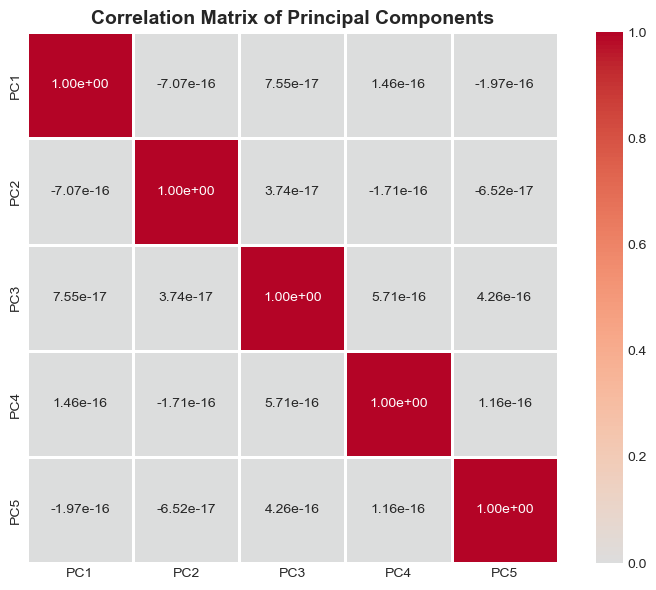

In [ ]:
# Verify PCA properties: Principal components are uncorrelated
correlation_matrix = np.corrcoef(X_pca[:, :5], rowvar=False)

print("Correlation matrix of first 5 principal components:")
print(correlation_matrix)
print("\n✓ Off-diagonal elements are ~0, confirming orthogonality!")

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2e', cmap='coolwarm',
            center=0, square=True, linewidths=1, ax=ax,
            xticklabels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
            yticklabels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
ax.set_title('Correlation Matrix of Principal Components', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Key Takeaways: PCA

1. **Always standardize** before PCA (it's scale-sensitive)
2. **Choose components** that explain 95-99% of variance
3. **Principal components are uncorrelated** (orthogonal)
4. **Loss of interpretability**: PCs are linear combinations of original features
5. **Use cases**: Visualization, noise reduction, speeding up algorithms

---

## 8. Building Complete Pipelines <a id="pipelines"></a>

In practice, we apply multiple preprocessing steps. **Pipelines** help us:
1. Organize preprocessing steps
2. Avoid data leakage (fitting on training data only)
3. Simplify code and reduce errors

### Why Pipelines?

**Bad practice:**
```python
# Fit on ALL data (including test) - DATA LEAKAGE!
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled)
```

**Good practice:**
```python
# Fit on training data only
X_train, X_test = train_test_split(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use training statistics
```

Pipelines do this automatically!

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare data
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (455, 30)
Test set: (114, 30)


In [ ]:
# Build a complete preprocessing + modeling pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler()),                   # Standardize features
    ('pca', PCA(n_components=0.95)),               # Reduce dimensionality (95% variance)
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Train model
])

print("Pipeline steps:")
for step_name, step_obj in pipeline.steps:
    print(f"  {step_name}: {step_obj.__class__.__name__}")

Pipeline steps:
  imputer: SimpleImputer
  scaler: StandardScaler
  pca: PCA
  classifier: LogisticRegression


In [ ]:
# Train the pipeline (all steps applied automatically!)
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))


Test Accuracy: 98.25%

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        43
      Benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Check how many components PCA selected
pca_step = pipeline.named_steps['pca']
n_components_selected = pca_step.n_components_

print(f"PCA selected {n_components_selected} components (from {X_train.shape[1]} original features)")
print(f"Variance explained: {pca_step.explained_variance_ratio_.sum()*100:.2f}%")

PCA selected 10 components (from 30 original features)
Variance explained: 95.11%


In [ ]:
# Compare: Model WITHOUT preprocessing
model_no_prep = LogisticRegression(max_iter=1000, random_state=42)
model_no_prep.fit(X_train, y_train)
y_pred_no_prep = model_no_prep.predict(X_test)
accuracy_no_prep = accuracy_score(y_test, y_pred_no_prep)

print("\n" + "="*60)
print("COMPARISON: With vs Without Preprocessing")
print("="*60)
print(f"Without preprocessing: {accuracy_no_prep*100:.2f}%")
print(f"With preprocessing:    {accuracy*100:.2f}%")
print(f"\nImprovement: {(accuracy - accuracy_no_prep)*100:.2f} percentage points")
print(f"Dimensionality reduction: {X_train.shape[1]} → {n_components_selected} features")


COMPARISON: With vs Without Preprocessing
Without preprocessing: 95.61%
With preprocessing:    98.25%

Improvement: 2.63 percentage points
Dimensionality reduction: 30 → 10 features


### Advanced: ColumnTransformer for Mixed Data Types

Real datasets have both numerical and categorical features. Use `ColumnTransformer` to apply different preprocessing to different columns.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a mixed dataset (adding artificial categorical features)
df_mixed = df.copy()
df_mixed['size_category'] = pd.cut(df['mean area'], bins=3, labels=['Small', 'Medium', 'Large'])
df_mixed['texture_level'] = pd.cut(df['mean texture'], bins=2, labels=['Low', 'High'])

print("Mixed dataset with categorical features:")
print(df_mixed[['mean radius', 'mean texture', 'size_category', 'texture_level']].head())

Mixed dataset with categorical features:
   mean radius  mean texture size_category texture_level
0        17.99         10.38        Medium           Low
1        20.57         17.77        Medium           Low
2        19.69         21.25        Medium           Low
3        11.42         20.38         Small           Low
4        20.29         14.34        Medium           Low


In [ ]:
# Define numerical and categorical features
numerical_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
categorical_features = ['size_category', 'texture_level']

# Create preprocessing pipelines for each type
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Full pipeline with model
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

print("Complete Pipeline with ColumnTransformer:")
print(full_pipeline)

Complete Pipeline with ColumnTransformer:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                 

In [ ]:
# Train and evaluate
X_mixed = df_mixed[numerical_features + categorical_features]
y_mixed = df_mixed['target']

X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_split(
    X_mixed, y_mixed, test_size=0.2, random_state=42
)

# Fit and predict
full_pipeline.fit(X_train_mixed, y_train_mixed)
y_pred_mixed = full_pipeline.predict(X_test_mixed)

accuracy_mixed = accuracy_score(y_test_mixed, y_pred_mixed)
print(f"\nTest Accuracy with mixed data types: {accuracy_mixed*100:.2f}%")
print("\n✓ Pipeline handled numerical AND categorical features automatically!")


Test Accuracy with mixed data types: 92.98%

✓ Pipeline handled numerical AND categorical features automatically!


---

## 9. Summary and Best Practices <a id="summary"></a>

### Summary of Techniques

| Technique | Purpose | When to Use | Scikit-learn Class |
|-----------|---------|-------------|--------------------|
| **Missing Values** | | | |
| Mean Imputation | Fill with mean | Normal numerical data | `SimpleImputer(strategy='mean')` |
| Median Imputation | Fill with median | Skewed data, outliers | `SimpleImputer(strategy='median')` |
| KNN Imputation | Fill using neighbors | Preserve relationships | `KNNImputer(n_neighbors=5)` |
| **Scaling** | | | |
| Min-Max | Scale to [0,1] | Need bounded values | `MinMaxScaler()` |
| Standardization | Mean=0, Std=1 | Normal data, most ML | `StandardScaler()` |
| Robust | Use median, IQR | Data with outliers | `RobustScaler()` |
| **Encoding** | | | |
| Label Encoding | Categories → integers | Ordinal, target variable | `LabelEncoder()` |
| One-Hot | Categories → binary vectors | Nominal categories | `OneHotEncoder()` |
| Ordinal | Ordered categories | When order matters | `OrdinalEncoder()` |
| **Transformation** | | | |
| Binning | Discretize continuous | Create categories | `KBinsDiscretizer()` |
| Power Transform | Make Gaussian | Skewed distributions | `PowerTransformer()` |
| **Dimensionality** | | | |
| PCA | Reduce dimensions | High-dim data, visualization | `PCA(n_components=...)` |

### Best Practices Checklist

**Before Training:**
1. Explore data: Check distributions, missing values, outliers
2. Split data FIRST: Separate training and test sets
3. Fit on training only: Avoid data leakage
4. Use pipelines: Automate preprocessing

**Handling Missing Values:**
1. Understand WHY data is missing (random vs systematic)
2. Consider domain knowledge for imputation strategy
3. Document imputation choices

**Scaling:**
1. Always scale for: Neural networks, SVM, KNN, algorithms using distance or gradients
2. Not necessary for: Tree-based models (Random Forest, XGBoost)
3. Choose scaler based on data distribution

**Encoding:**
1. One-hot for nominal (no order)
2. Ordinal for ordinal (has order)
3. Consider cardinality (too many categories → curse of dimensionality)

**Dimensionality Reduction:**
1. Always standardize before PCA
2. Keep 95-99% variance
3. Use for visualization (2-3 components)
4. Consider interpretability loss

### Common Pitfalls to Avoid

**Data Leakage**: Fitting preprocessing on full dataset (including test)
```python
# WRONG
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled)
```

**Correct**:
```python
X_train, X_test = train_test_split(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

**Wrong Encoding**: Label encoding for nominal categories creates artificial ordering

**Forgetting to Scale**: Using distance-based algorithms without scaling

**Over-engineering**: Applying all techniques without understanding the data

### Next Course on Friday

Now that you understand data processing, you're ready for:
1. **Classical Machine Learning Models**: Linear/Logistic Regression, SVM, Advanced Regression techniques
2. **Deep Learning Methods**: Neural networks (which require careful preprocessing!)

### Additional Resources

- **Scikit-learn Documentation**: https://scikit-learn.org/
- **Preprocessing Guide**: https://scikit-learn.org/stable/modules/preprocessing.html
- **Pipeline Tutorial**: https://scikit-learn.org/stable/modules/compose.html

---

## Practice Exercises

Try these exercises using `sample_dataset_bins.csv` or `sample_dataset.csv`  :

**Question 1**
* Load **sample_dataset.csv**
* Numerical variables must be cleaned using the median value, then normalized
* Change the scaler to standard scaler and transform the dataset again

**Question 2**
```python
X = [["X","High"],["Y","Low"],["Z","Medium"],["X","Low"]]
```
* Apply One-hot encoding to all variables
* Apply One-hot encoding to the first column and ordinal encoding to the second column following the rank Low, Medium, High

**Question 3**
* Consider only the first 3 columns and remove all the records that have missings
* Calculate the mean value of "mean radius"
* Use a ColumnTransformer to apply the following transformations:
    * Binarize "mean radius" using a threshold equal to the mean value
    * Binning of "mean texture" with 10 uniform bins and one-hot encoded dense output
    * Binning of "mean perimeter" with 5 quantile bins and ordinal encoding output

**Question 4**
* Apply the following transformations using ColumnTransformer and Pipeline:
    * Numerical features:
        * Cleaning using the mean value
        * Transformation using the Yeo-Johnson transformation
    * Categorical features:
        * Cleaning using the most probable value
        * One-hot encoding with dense output

**Question 5**
* Load **diabetes** dataset
* Apply PCA and search for the optimal number of components graphically
* Apply PCA taking the 80% of the variance

**Question 6**
* Load **sample_dataset.csv**. The first 10 columns are the features and the "target" column is the target
* Create a pipeline with these transformations:
    * Blank filling with median value
    * Standardization
    * Feature selection using ANOVA and selecting the 3 most important variables according to the given target

**Question 7**
* Load **wine** dataset
* Apply standardization to the features
* Apply SMOTE to balance the target classes
* Invert standardization to go back to the original feature space


---

**Good luck with your AIMS machine learning journey!**

*Remember: Data preprocessing is often 80% of the work in machine learning. Master these techniques and you'll build much better models!*